# Location - Kaggle Competition

https://www.kaggle.com/competitions/184702-tu-ml-ss-22-location/data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import time

### Load dataset

In [4]:
df  = pd.read_csv("Location446-30cls-5k.lrn.csv", sep=',')
df

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,3996,27,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3997,3997,15,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3998,3998,19,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Target

30 classes : an average of 133 occurencies per class 

There is not a notable distribution over the target values : the classes seems to be independant

**the target an be encoded into a verctor** 

In [5]:
target = df["class"]

Text(0.5, 1.0, 'Target distribution')

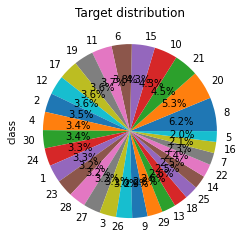

In [6]:
target.value_counts().plot.pie(autopct='%1.1f%%').set_title("Target distribution")

In [7]:
target.value_counts().sort_index()

1     132
2     141
3     124
4     135
5      80
6     150
7      90
8     250
9     114
10    173
11    149
12    142
13    103
14     99
15    171
16     83
17    144
18    103
19    146
20    211
21    181
22     98
23    128
24    133
25    100
26    119
27    126
28    127
29    113
30    135
Name: class, dtype: int64

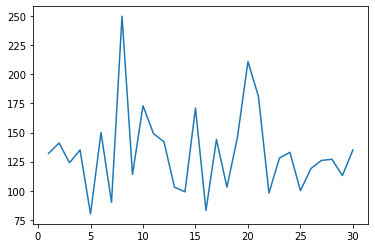

In [8]:
plt.plot(target.value_counts().sort_index())

In [9]:
target.value_counts().mean()

133.33333333333334

In [10]:
target.value_counts().median()

130.0

## Data

all attributes are True/False attributes without missing values

In [11]:
data = df.drop(columns=["ID", "class"])
data

,1,2,3,4,5,6,7,8,9,10,...,437,438,439,440,441,442,443,444,445,446
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3997,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### A quick overview of the Attribut 1

In [12]:
att = df["1"]
att

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: 1, Length: 4000, dtype: int64

In [13]:
val, counts = np.unique(att, return_counts=True)
val, counts

(array([0, 1]), array([3775,  225]))

Text(0.5, 1.0, 'Target distribution')

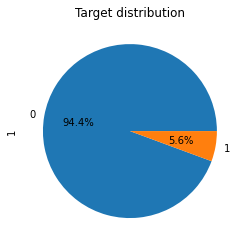

In [14]:
att.value_counts().plot.pie(autopct='%1.1f%%').set_title("Target distribution")

### Distribution for all attributes

There is no missing values in the entire dataset 

In [15]:
for col in data.columns :
    val, counts = np.unique(data[col], return_counts=True)
    print(col, val, counts)

1 [0 1] [3775  225]
2 [0 1] [3283  717]
3 [0 1] [3808  192]
4 [0 1] [1876 2124]
5 [0 1] [3616  384]
6 [0 1] [3572  428]
7 [0 1] [3880  120]
8 [0 1] [3773  227]
9 [0 1] [3349  651]
10 [0 1] [3746  254]
11 [0 1] [3509  491]
12 [0 1] [3474  526]
13 [0 1] [3400  600]
14 [0 1] [2137 1863]
15 [0 1] [3848  152]
16 [0 1] [3814  186]
17 [0 1] [3421  579]
18 [0 1] [3875  125]
19 [0 1] [3858  142]
20 [0 1] [3738  262]
21 [0 1] [3602  398]
22 [0 1] [3199  801]
23 [0 1] [2311 1689]
24 [0 1] [3180  820]
25 [0 1] [2930 1070]
26 [0 1] [3870  130]
27 [0 1] [3368  632]
28 [0 1] [3827  173]
29 [0 1] [3716  284]
30 [0 1] [3840  160]
31 [0 1] [3646  354]
32 [0 1] [2675 1325]
33 [0 1] [2866 1134]
34 [0 1] [3343  657]
35 [0 1] [2507 1493]
36 [0 1] [1241 2759]
37 [0 1] [3795  205]
38 [0 1] [3849  151]
39 [0 1] [3709  291]
40 [0 1] [2925 1075]
41 [0 1] [3853  147]
42 [0 1] [1769 2231]
43 [0 1] [3860  140]
44 [0 1] [2961 1039]
45 [0 1] [3870  130]
46 [0 1] [3846  154]
47 [0 1] [1788 2212]
48 [0 1] [3399  601]
4

In [16]:
# number of missing values for each attribute
ms_count = data.isna().sum()
ms_count += data.isnull().sum()
# number of attributes with missing values
(ms_count != 0).sum()

0

No missing values and only True/False attributes

## Train Test set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train = pd.read_csv("Location446-30cls-5k.lrn.csv", sep=',')
predi = pd.read_csv("Location446-30cls-5k.tes.csv", sep=',')

# train set
X = train.drop(columns=["class", "ID"])
y = train["class"]

# test set
X_predi = predi.drop(columns=["ID"])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [20]:
X_train.shape, X_test.shape

((2800, 446), (1200, 446))

## Model selection

We select our model with a quick GridSearchCV just to have a good approximation of what can be the performance of all these following classifiers.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

import time

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [22]:
# Classifiers
classifiers = {"RandomForest" : RandomForestClassifier(random_state=0),
              "AdaBoost" : AdaBoostClassifier(random_state=0),
              "KNN" : KNeighborsClassifier(),
              "SVM" : SVC(random_state=0),
              "LGBM": LGBMClassifier(random_state=0)}

# Grids for grid search
RF_grid = {'n_estimators': [50, 100, 150, 200, 300],
           'max_depth': [4, 5, 6, 7, 8]}

Ada_grid = {'n_estimators': [100, 150, 200, 300],
        'learning_rate': [0.01, 0.1, 1, 10]}

KNN_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11],
            'p': [1, 2]}

SVC_grid = {'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]}

LGBM_grid = {"max_depth" : [2, 4, 6, 8],
        "num_leaves" : [2, 4, 6, 10, 15]}

# Dictionary of all grids
grid = {
    "RandomForest" : RF_grid,
    "AdaBoost" : Ada_grid,
    "KNN" : KNN_grid,
    "SVM" : SVC_grid,
    "LGBM": LGBM_grid
}

In [24]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':list(classifiers.keys()), 
                           'F1-Score': np.zeros(len(classifiers)), 
                           'Training time': np.zeros(len(classifiers))})

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(classifier, param_grid=grid[key], scoring="accuracy", cv = 3, verbose=2, n_jobs = 6)

    # Train
    clf.fit(X_train, y_train)

    # Save params, score, time
    clf_best_params[key] = clf.best_params_
    valid_scores.iloc[i,1] = clf.score(X_test, y_test)
    stop = time.time()
    valid_scores.iloc[i,2] = np.round((stop - start)/60, 2)
    
    #y_pred = clf.predict(X_test)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('Score :', valid_scores.iloc[i,1])
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print('')
    i+=1
    
valid_scores

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done  75 out of  75 | elapsed:    7.4s finished


Model: RandomForest
Training time (mins): 0.14
Score : 0.445

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed:   26.1s finished


Model: AdaBoost
Training time (mins): 0.47
Score : 0.30833333333333335

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:   12.6s finished


Model: KNN
Training time (mins): 0.25
Score : 0.42583333333333334

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done  72 out of  72 | elapsed:  1.2min finished


Model: SVM
Training time (mins): 1.34
Score : 0.6941666666666667

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   31.5s
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:  1.3min finished


Model: LGBM
Training time (mins): 1.34
Score : 0.5683333333333334



,Classifer,F1-Score,Training time
0,RandomForest,0.445000,0.14
1,AdaBoost,0.308333,0.47
2,KNN,0.425833,0.25
3,SVM,0.694167,1.34
4,LGBM,0.568333,1.34


In [25]:
clf_best_params["SVM"]

{'C': 10, 'gamma': 0.01}

We will chose the SVC classifier to tune his hyper-parameters

## SVC with cross-validation

In [26]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

In [27]:
def cross_predictions (model, X, y, X_test) :
    X_train = np.array(X.copy())
    y_train = np.array(y.copy())

    # fiting with StratifiedKFold, 9 folds
    FOLDS = 9
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    preds = pd.DataFrame()
    score=0

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        # Get training and validation sets
        X_cross, X_valid = X_train[train_idx], X_train[val_idx]
        y_cross, y_valid = y_train[train_idx], y_train[val_idx]

        # Train model
        model.fit(X_cross, y_cross)

        # Make predictions and measure accuracy
        preds[fold] = model.predict(X_test)
        s = model.score(X_valid, y_valid)
        score += s
        
        # display information
        print("fold", fold+1, ":", s)

    # Average accuracy and predictions 
    score = score/FOLDS

    return score, preds

In [28]:
model = SVC(C=10, gamma=0.01, random_state=0)

In [29]:
score, y_pred = cross_predictions(model, X_train, y_train, X_test)

fold 1 : 0.6474358974358975
fold 2 : 0.6913183279742765
fold 3 : 0.6784565916398714
fold 4 : 0.707395498392283
fold 5 : 0.6945337620578779
fold 6 : 0.6816720257234726
fold 7 : 0.6816720257234726
fold 8 : 0.6945337620578779
fold 9 : 0.7041800643086816


In [30]:
score

0.6867997728126346

In [31]:
y_pred = y_pred.mode(axis=1)[0]
y_pred.shape

(1200,)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.83      0.77        35
           2       0.82      0.84      0.83        49
           3       0.73      0.82      0.78        40
           4       0.87      0.80      0.84        51
           5       0.57      0.44      0.50        18
           6       0.62      0.57      0.59        42
           7       0.83      0.77      0.80        31
           8       0.74      0.87      0.80        83
           9       0.56      0.69      0.62        36
          10       0.64      0.72      0.68        54
          11       0.79      0.73      0.76        41
          12       0.65      0.67      0.66        42
          13       0.80      0.69      0.74        35
          14       0.59      0.61      0.60        28
          15       0.74      0.74      0.74        43
          16       0.57      0.62      0.59        21
          17       0.61      0.61      0.61        49
          18       0.64    

## Feature selection with cross-validation

Because of the big amount of attributes we would like to reduce their amount in order to reduce the learning time for tuning the hyper-parameters of the SVC.

We will then perform an Anova and a PCA.

In [33]:
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

### Anova

In [34]:
def train_fs (model, X, y, X_test, nb) :
    fs = SelectKBest(score_func=f_classif, k=nb)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    X_test_fs = fs.transform(X_test)

    return cross_predictions(model, X_fs, y, X_test_fs)

In [35]:
# Quick anova with CV on all attributes keeping the best 100 attributes
score, y_pred = train_fs(model, X, y, X_test, 100)
score

fold 1 : 0.5887640449438202
fold 2 : 0.5775280898876405
fold 3 : 0.6022471910112359
fold 4 : 0.5573033707865168
fold 5 : 0.5900900900900901
fold 6 : 0.5653153153153153
fold 7 : 0.5202702702702703
fold 8 : 0.6126126126126126
fold 9 : 0.6013513513513513


0.5794980373632058

In [114]:
score_fs = {}
preds_fs = {}

# Anova for k best attributes going from 20 to 440 on the entire train set
for i in np.linspace(20, 440, 43) :
    print("Nb of attributes ----->", i)
    score, y_pred = train_fs(model, X, y, X_test, int(i))
    print("Score :", score)
    print("")
    score_fs[i] = score
    preds_fs[i] = y_pred

Nb of attributes -----> 20.0
fold 1 : 0.24719101123595505
fold 2 : 0.23820224719101124
fold 3 : 0.2449438202247191
fold 4 : 0.2449438202247191
fold 5 : 0.22297297297297297
fold 6 : 0.22297297297297297
fold 7 : 0.22297297297297297
fold 8 : 0.23873873873873874
fold 9 : 0.23198198198198197
Score : 0.23499117094622715

Nb of attributes -----> 30.0
fold 1 : 0.3348314606741573
fold 2 : 0.33707865168539325
fold 3 : 0.38202247191011235
fold 4 : 0.350561797752809
fold 5 : 0.32657657657657657
fold 6 : 0.3355855855855856
fold 7 : 0.31756756756756754
fold 8 : 0.31981981981981983
fold 9 : 0.3063063063063063
Score : 0.3344833597642587

Nb of attributes -----> 40.0
fold 1 : 0.3775280898876405
fold 2 : 0.34606741573033706
fold 3 : 0.42921348314606744
fold 4 : 0.3775280898876405
fold 5 : 0.39864864864864863
fold 6 : 0.38063063063063063
fold 7 : 0.3918918918918919
fold 8 : 0.39864864864864863
fold 9 : 0.39414414414414417
Score : 0.3882556714017389

Nb of attributes -----> 50.0
fold 1 : 0.429213483146067

fold 5 : 0.7072072072072072
fold 6 : 0.6936936936936937
fold 7 : 0.6756756756756757
fold 8 : 0.7027027027027027
fold 9 : 0.713963963963964
Score : 0.7052417586125451

Nb of attributes -----> 290.0
fold 1 : 0.7056179775280899
fold 2 : 0.7325842696629213
fold 3 : 0.698876404494382
fold 4 : 0.7033707865168539
fold 5 : 0.7004504504504504
fold 6 : 0.6891891891891891
fold 7 : 0.6756756756756757
fold 8 : 0.7117117117117117
fold 9 : 0.7184684684684685
Score : 0.7039938815219714

Nb of attributes -----> 300.0
fold 1 : 0.6853932584269663
fold 2 : 0.7325842696629213
fold 3 : 0.7078651685393258
fold 4 : 0.7078651685393258
fold 5 : 0.7072072072072072
fold 6 : 0.6756756756756757
fold 7 : 0.6779279279279279
fold 8 : 0.7094594594594594
fold 9 : 0.7207207207207207
Score : 0.7027443173510588

Nb of attributes -----> 310.0
fold 1 : 0.6853932584269663
fold 2 : 0.7325842696629213
fold 3 : 0.7078651685393258
fold 4 : 0.7078651685393258
fold 5 : 0.7162162162162162
fold 6 : 0.6756756756756757
fold 7 : 0.68918

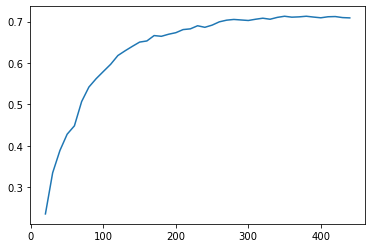

In [115]:
plt.plot(score_fs.keys(), score_fs.values())

In [118]:
max_key = max(score_fs, key=score_fs.get)
print(max_key, ":", score_fs[max_key])

380.0 : 0.7129967045697384


We obtained a maximum score of 71.3% for an Anova keeping the 380 best attributes with the simple SVC model

### PCA

In [36]:
def train_PCA (model, X, y, X_test, nb) :
    pca = PCA(n_components = nb, random_state=0)
    pca.fit(X)

    X_pca = pca.transform(X)
    X_test_pca = pca.transform(X_test)

    return cross_predictions(model, X_pca, y, X_test_pca)

In [37]:
# Quick PCA with CV on all attributes keeping the best 100 attributes
train_PCA(model, X, y, X_test, 100)[0]

fold 1 : 0.7033707865168539
fold 2 : 0.7101123595505618
fold 3 : 0.7258426966292135
fold 4 : 0.6808988764044944
fold 5 : 0.704954954954955
fold 6 : 0.7004504504504504
fold 7 : 0.6779279279279279
fold 8 : 0.7072072072072072
fold 9 : 0.6936936936936937


0.7004954392594842

In [121]:
score_pca = {}
preds_pca = {}

# PCA for k going from 20 to 440 
# ----------------------------- Can take several minutes ----------------------
for i in np.linspace(20, 440, 43) :
    print("Nb of attributes ----->", i)
    score, y_pred = train_PCA(model, X, y, X_test, int(i))
    print("Score :", score)
    print("")
    score_pca[i] = score
    preds_pca[i] = y_pred

Nb of attributes -----> 20.0
fold 1 : 0.701123595505618
fold 2 : 0.7078651685393258
fold 3 : 0.7258426966292135
fold 4 : 0.6786516853932584
fold 5 : 0.6936936936936937
fold 6 : 0.6959459459459459
fold 7 : 0.7004504504504504
fold 8 : 0.7274774774774775
fold 9 : 0.740990990990991
Score : 0.7080046338473305

Nb of attributes -----> 30.0
fold 1 : 0.7168539325842697
fold 2 : 0.7146067415730337
fold 3 : 0.7460674157303371
fold 4 : 0.6831460674157304
fold 5 : 0.7184684684684685
fold 6 : 0.7207207207207207
fold 7 : 0.7184684684684685
fold 8 : 0.7297297297297297
fold 9 : 0.75
Score : 0.7220068382989732

Nb of attributes -----> 40.0
fold 1 : 0.7123595505617978
fold 2 : 0.7146067415730337
fold 3 : 0.7348314606741573
fold 4 : 0.7033707865168539
fold 5 : 0.6801801801801802
fold 6 : 0.7274774774774775
fold 7 : 0.7004504504504504
fold 8 : 0.7274774774774775
fold 9 : 0.7432432432432432
Score : 0.7159997075727412

Nb of attributes -----> 50.0
fold 1 : 0.7213483146067415
fold 2 : 0.7168539325842697
fold

fold 8 : 0.713963963963964
fold 9 : 0.7117117117117117
Score : 0.7097530114384047

Nb of attributes -----> 290.0
fold 1 : 0.7168539325842697
fold 2 : 0.698876404494382
fold 3 : 0.7235955056179775
fold 4 : 0.6876404494382022
fold 5 : 0.7184684684684685
fold 6 : 0.7027027027027027
fold 7 : 0.704954954954955
fold 8 : 0.7117117117117117
fold 9 : 0.7117117117117117
Score : 0.7085017601871536

Nb of attributes -----> 300.0
fold 1 : 0.7123595505617978
fold 2 : 0.701123595505618
fold 3 : 0.7213483146067415
fold 4 : 0.701123595505618
fold 5 : 0.722972972972973
fold 6 : 0.6959459459459459
fold 7 : 0.7162162162162162
fold 8 : 0.7094594594594594
fold 9 : 0.704954954954955
Score : 0.7095005117477028

Nb of attributes -----> 310.0
fold 1 : 0.7191011235955056
fold 2 : 0.7033707865168539
fold 3 : 0.7303370786516854
fold 4 : 0.7033707865168539
fold 5 : 0.713963963963964
fold 6 : 0.7027027027027027
fold 7 : 0.7094594594594594
fold 8 : 0.704954954954955
fold 9 : 0.7072072072072072
Score : 0.7104964515076

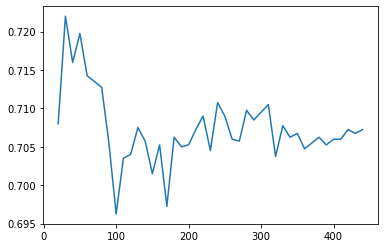

In [123]:
plt.plot(score_pca.keys(), score_pca.values())

In [133]:
max_key = max(score_pca, key=score_pca.get)
print(max_key, ":", score_pca[max_key])

30.0 : 0.7220068382989732


In [127]:
score_quick_pca = {}
preds_quick_pca = {}

# Quick PCA for i going from 5 to 50
for i in np.linspace(10, 70, 21) :
    print("Nb of attributes ----->", i)
    score, y_pred = train_PCA(model, X, y, X_test, int(i))
    print("Score :", score)
    print("")
    score_quick_pca[i] = score
    preds_quick_pca[i] = y_pred

Nb of attributes -----> 10.0
fold 1 : 0.6359550561797753
fold 2 : 0.6539325842696629
fold 3 : 0.6584269662921348
fold 4 : 0.6382022471910113
fold 5 : 0.6238738738738738
fold 6 : 0.6261261261261262
fold 7 : 0.6644144144144144
fold 8 : 0.6441441441441441
fold 9 : 0.6599099099099099
Score : 0.6449983691556725

Nb of attributes -----> 13.157894736842106
fold 1 : 0.6606741573033708
fold 2 : 0.7078651685393258
fold 3 : 0.7101123595505618
fold 4 : 0.6606741573033708
fold 5 : 0.6418918918918919
fold 6 : 0.6486486486486487
fold 7 : 0.6666666666666666
fold 8 : 0.6914414414414415
fold 9 : 0.7252252252252253
Score : 0.6792444129522782

Nb of attributes -----> 16.315789473684212
fold 1 : 0.6808988764044944
fold 2 : 0.7078651685393258
fold 3 : 0.7078651685393258
fold 4 : 0.6764044943820224
fold 5 : 0.7004504504504504
fold 6 : 0.6824324324324325
fold 7 : 0.7072072072072072
fold 8 : 0.7297297297297297
fold 9 : 0.75
Score : 0.7047615030761097

Nb of attributes -----> 19.473684210526315
fold 1 : 0.68539

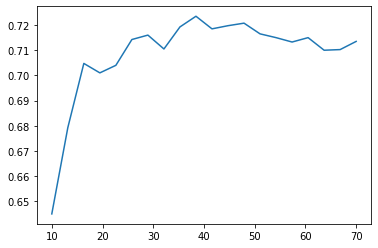

In [129]:
plt.plot(score_quick_pca.keys(), score_quick_pca.values())

In [132]:
max_key = max(score_quick_pca, key=score_quick_pca.get)
print(max_key, ":", score_quick_pca[max_key])

38.421052631578945 : 0.7234948431577646


In [141]:
score_quick_pca = {}
preds_quick_pca = {}

# Quick PCA for i going from 5 to 50
for i in np.linspace(25, 65, 16) :
    print("Nb of attributes ----->", int(i))
    score, y_pred = train_PCA(model, X, y, X_test, int(i))
    print("Score :", score)
    print("")
    score_quick_pca[i] = score
    preds_quick_pca[i] = y_pred

Nb of attributes -----> 25
fold 1 : 0.701123595505618
fold 2 : 0.7033707865168539
fold 3 : 0.7325842696629213
fold 4 : 0.6674157303370787
fold 5 : 0.7094594594594594
fold 6 : 0.713963963963964
fold 7 : 0.7162162162162162
fold 8 : 0.7342342342342343
fold 9 : 0.7319819819819819
Score : 0.7122611375420366

Nb of attributes -----> 27
fold 1 : 0.7033707865168539
fold 2 : 0.7146067415730337
fold 3 : 0.7348314606741573
fold 4 : 0.701123595505618
fold 5 : 0.7004504504504504
fold 6 : 0.7297297297297297
fold 7 : 0.7184684684684685
fold 8 : 0.722972972972973
fold 9 : 0.7454954954954955
Score : 0.7190055223763089

Nb of attributes -----> 30
fold 1 : 0.698876404494382
fold 2 : 0.698876404494382
fold 3 : 0.750561797752809
fold 4 : 0.6943820224719102
fold 5 : 0.7094594594594594
fold 6 : 0.7184684684684685
fold 7 : 0.704954954954955
fold 8 : 0.713963963963964
fold 9 : 0.740990990990991
Score : 0.714503829672369

Nb of attributes -----> 33
fold 1 : 0.7033707865168539
fold 2 : 0.7078651685393258
fold 3 

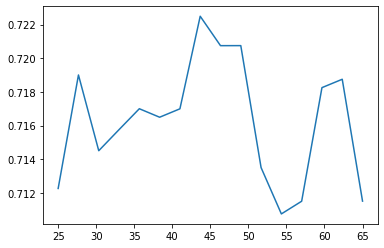

In [142]:
plt.plot(score_quick_pca.keys(), score_quick_pca.values())

In [143]:
max_key = max(score_quick_pca, key=score_quick_pca.get)
print(max_key, ":", score_quick_pca[max_key])

43.666666666666664 : 0.7224960915972152


In [39]:
train_PCA(model, X, y, X_test, 45)[0]

fold 1 : 0.7235955056179775
fold 2 : 0.7101123595505618
fold 3 : 0.7460674157303371
fold 4 : 0.7056179775280899
fold 5 : 0.713963963963964
fold 6 : 0.7252252252252253
fold 7 : 0.6869369369369369
fold 8 : 0.7252252252252253
fold 9 : 0.75


0.7207494010864797

We will keep 45 attributes

## Preprocessing on train and test set

In [38]:
train = pd.read_csv("Location446-30cls-5k.lrn.csv", sep=',')
predi = pd.read_csv("Location446-30cls-5k.tes.csv", sep=',')

# train set
X = train.drop(columns=["class", "ID"])
y = train["class"]

# test set
X_predi = predi.drop(columns=["ID"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [39]:
# PCA fit
pca = PCA(n_components = 45, random_state=0)
pca.fit(X)

# PCA transform
X = pca.transform(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_predi = pca.transform(X_predi)

In [40]:
X.shape, X_train.shape, X_test.shape, X_predi.shape

((4000, 45), (2800, 45), (1200, 45), (1009, 45))

## Tuning SVC

In [41]:
import skopt
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

In [42]:
space_SVC = [
    Real(1e-5, 1000.0, 'log-uniform', name='C'),
    Integer(1, 5, name='degree'),
    Real(1e-5, 1000.0, 'log-uniform', name='gamma')
]

In [43]:
@use_named_args(space_SVC)
def evaluate_SVC(**params):
    # configure the model with specific hyperparameters
    model = SVC(random_state=0)
    model.set_params(**params)
    # define test harness
    cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=0)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = np.mean(result)
    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate

In [90]:
result_SVC = gp_minimize(evaluate_SVC, space_SVC)

In [91]:
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result_SVC.fun))
print('Best Parameters: %s' % (result_SVC.x))

Best Accuracy: 0.726
Best Parameters: [12.906962366192472, 5, 0.013467667283001751]


## Final predictions SVM

In [44]:
model = SVC(C = 12.906962366192472, degree=5, gamma=0.013467667283001751, random_state=0)

In [45]:
score, preds = cross_predictions(model, X, y, X_predi)

fold 1 : 0.7235955056179775
fold 2 : 0.7235955056179775
fold 3 : 0.7573033707865169
fold 4 : 0.7101123595505618
fold 5 : 0.7162162162162162
fold 6 : 0.7319819819819819
fold 7 : 0.6824324324324325
fold 8 : 0.75
fold 9 : 0.740990990990991


In [46]:
score

0.7262475959105172

In [47]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [48]:
predictions = preds.mode(axis=1)[0]

In [49]:
predictions.shape

(1009,)

In [50]:
final = pd.DataFrame()
final["ID"] = predi["ID"]
final["class"] = predictions.astype("int")

final

,ID,class
0,4000,5
1,4001,20
2,4002,15
3,4003,30
4,4004,19
...,...,...
1004,5004,8
1005,5005,20
1006,5006,10
1007,5007,20


In [51]:
final.to_csv("pca_skopt_svm.csv", index=False)